In [1]:
# Importing libraries

import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

import os
from datetime import datetime

In [ ]:
# Load the data

In [2]:
df_property = pd.read_csv("./datasets/property_data_set.csv")
df_photos = pd.read_csv("./datasets/property_photos.tsv", sep='\t')
df_interactions = pd.read_csv("./datasets/property_interactions.csv")

In [3]:
df_property.head()

,property_id,type,activation_date,bathroom,floor,total_floor,furnishing,gym,latitude,longitude,...,lift,locality,parking,property_age,property_size,swimming_pool,pin_code,rent,deposit,building_type
0,ff808081469fd6e20146a5af948000ea,BHK2,09-03-2017 14:36,1,3,4.0,SEMI_FURNISHED,1,12.876174,77.596571,...,1,Hulimavu,BOTH,2,850,1,560076.0,12000,120000,AP
1,ff8080814702d3d10147068359d200cd,BHK2,07-03-2017 12:02,2,4,11.0,SEMI_FURNISHED,1,13.018444,77.678122,...,1,Ramamurthy Nagar,BOTH,1,1233,1,560016.0,20000,150000,AP
2,ff808081470c645401470fb03f5800a6,BHK2,10-03-2017 13:43,2,0,4.0,NOT_FURNISHED,1,12.975072,77.665865,...,1,GM Palya,FOUR_WHEELER,0,1200,0,560075.0,15000,75000,AP
3,ff808081470c6454014715eaa5960281,BHK3,09-03-2017 22:16,2,3,4.0,SEMI_FURNISHED,0,12.888169,77.591282,...,0,Arakere,BOTH,1,1300,0,560076.0,17000,150000,AP
4,ff808081474aa867014771a0298f0aa6,BHK1,15-03-2017 18:29,1,1,2.0,SEMI_FURNISHED,0,12.990243,77.712962,...,0,Hoodi,BOTH,4,450,0,560048.0,6500,40000,IF


In [58]:
len(df_property)

28888

In [59]:
df_property['property_id'].nunique()

28888

In [60]:
df_property.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28888 entries, 0 to 28887
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   property_id      28888 non-null  object        
 1   type             28888 non-null  object        
 2   activation_date  28888 non-null  datetime64[ns]
 3   bathroom         28888 non-null  int64         
 4   floor            28888 non-null  int64         
 5   total_floor      28845 non-null  float64       
 6   furnishing       28888 non-null  object        
 7   gym              28888 non-null  int64         
 8   latitude         28888 non-null  float64       
 9   longitude        28888 non-null  float64       
 10  lease_type       28888 non-null  object        
 11  lift             28888 non-null  int64         
 12  locality         28888 non-null  object        
 13  parking          28888 non-null  object        
 14  property_age     28888 non-null  int64

In [64]:
cat_cols = [x for x in df_property.columns if df_property[x].dtype == 'object']
cat_cols.remove('property_id')
print(cat_cols)

['type', 'furnishing', 'lease_type', 'locality', 'parking', 'building_type']


In [70]:
for i in cat_cols:
    print("*"*50)
    print(i)
    print("*"*50)
    print(df_property[i].value_counts())
    print('\n\n')

**************************************************
type
**************************************************
type
BHK2        14071
BHK1         6565
BHK3         5725
RK1          2015
BHK4          440
BHK4PLUS       72
Name: count, dtype: int64



**************************************************
furnishing
**************************************************
furnishing
SEMI_FURNISHED     22463
NOT_FURNISHED       4863
FULLY_FURNISHED     1562
Name: count, dtype: int64



**************************************************
lease_type
**************************************************
lease_type
FAMILY      14885
ANYONE      12721
BACHELOR     1211
COMPANY        71
Name: count, dtype: int64



**************************************************
locality
**************************************************
locality
Whitefield                                  745
JP Nagar                                    655
Electronic City                             630
Ramamurthy Nagar                  

In [4]:
df_photos.head()

,property_id,photo_urls
0,ff808081469fd6e20146a5af948000ea,"[{\title\"":\""Balcony\"",\""name\"":\""IMG_20131006..."
1,ff8080814702d3d10147068359d200cd,NaN
2,ff808081470c645401470fb03f5800a6,"[{\title\"":\""Bedroom\"",\""name\"":\""ff808081470c..."
3,ff808081470c6454014715eaa5960281,"[{\title\"":\""Bedroom\"",\""name\"":\""Screenshot_7..."
4,ff808081474aa867014771a0298f0aa6,"[{\title\"":\""Other\"",\""name\"":\""ff808081474aa8..."


In [5]:
df_interactions.head()

,property_id,request_date
0,ff808081469fd6e20146a5af948000ea,2017-03-10 17:42:34
1,ff808081469fd6e20146a5af948000ea,2017-03-09 15:51:17
2,ff808081469fd6e20146a5af948000ea,2017-03-10 17:30:22
3,ff808081469fd6e20146a5af948000ea,2017-03-11 17:48:46
4,ff8080814702d3d10147068359d200cd,2017-03-30 19:59:15


In [ ]:
# Counting number of photos for each property id

In [6]:
import re
def count_photos(row):
    if type(row) == str:
        return row.count('_original.jpg')
    else:
        return 0

df_photos["count"] = df_photos["photo_urls"].apply(count_photos ) 

In [7]:
df_photos

,property_id,photo_urls,count
0,ff808081469fd6e20146a5af948000ea,"[{\title\"":\""Balcony\"",\""name\"":\""IMG_20131006...",7
1,ff8080814702d3d10147068359d200cd,NaN,0
2,ff808081470c645401470fb03f5800a6,"[{\title\"":\""Bedroom\"",\""name\"":\""ff808081470c...",12
3,ff808081470c6454014715eaa5960281,"[{\title\"":\""Bedroom\"",\""name\"":\""Screenshot_7...",9
4,ff808081474aa867014771a0298f0aa6,"[{\title\"":\""Other\"",\""name\"":\""ff808081474aa8...",7
...,...,...,...
28883,ff8081815b1fdda8015b1fe675ae0146,NaN,0
28884,ff8081815b1fdda8015b1ffee8a305d2,"[{\title\"":\""\"",\""name\"":\""files[]\"",\""imagesM...",7
28885,ff8081815b1fdda8015b2000369205fd,"[{\title\"":\""\"",\""name\"":\""files[]\"",\""imagesM...",6
28886,ff8081815b200540015b20158b0103c9,NaN,0


In [8]:
df_photos["count"].sum()

99993

In [10]:
#df_photos.iloc[[18167,13362,23864,9575,10496]]
#print(df_photos.iloc[10496]['photo_urls'])

In [ ]:
df_interactions.head()

In [14]:
# Transforming request data and activation date as date column
df_interactions['request_date'] = pd.to_datetime(df_interactions['request_date'])

df_property['activation_date'] = pd.to_datetime(df_property['activation_date'],format="%d-%m-%Y %H:%M")



In [23]:
df_interactions_comb = pd.merge(left=df_interactions, right=df_property, left_on='property_id', right_on='property_id',how='left')

In [26]:
df_interactions_comb= df_interactions_comb[['property_id','activation_date','request_date']]

In [36]:
df_interactions_comb['diff'] = df_interactions_comb['request_date']-df_interactions_comb['activation_date']

/var/folders/qj/rbyl_gdj7xn3ycgcxjpvn5080000gn/T/ipykernel_1275/2118719355.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_interactions_comb['diff'] = df_interactions_comb['request_date']-df_interactions_comb['activation_date']


In [38]:
df_interactions_comb['diff_days']=df_interactions_comb['diff'].dt.days

/var/folders/qj/rbyl_gdj7xn3ycgcxjpvn5080000gn/T/ipykernel_1275/3550093475.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_interactions_comb['diff_days']=df_interactions_comb['diff'].dt.days


<Axes: >

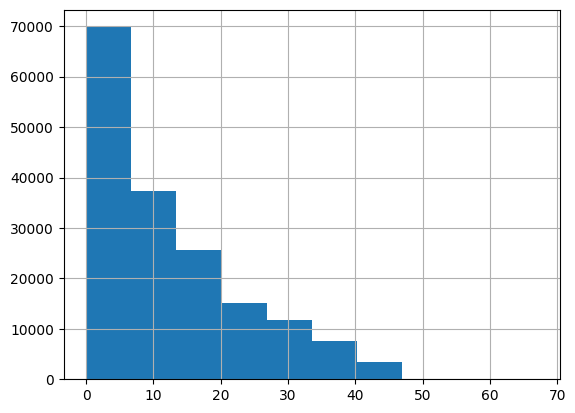

In [39]:
df_interactions_comb['diff_days'].hist()

In [46]:
df_interactions_comb['3_days']= df_interactions_comb['diff_days'].apply(lambda x: 1 if x<4 else 0)
df_interactions_comb['7_days']= df_interactions_comb['diff_days'].apply(lambda x: 1 if x<8 else 0)
df_interactions_comb['12_days']= df_interactions_comb['diff_days'].apply(lambda x: 1 if x<13 else 0)

/var/folders/qj/rbyl_gdj7xn3ycgcxjpvn5080000gn/T/ipykernel_1275/2200423148.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_interactions_comb['3_days']= df_interactions_comb['diff_days'].apply(lambda x: 1 if x<4 else 0)
/var/folders/qj/rbyl_gdj7xn3ycgcxjpvn5080000gn/T/ipykernel_1275/2200423148.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_interactions_comb['7_days']= df_interactions_comb['diff_days'].apply(lambda x: 1 if x<8 else 0)
/var/folders/qj/rbyl_gdj7xn3ycgcxjpvn5080000gn/T/ipykernel_1

12.318326485396604

In [54]:
df_combined = df_interactions_comb.groupby(['property_id']).agg({'3_days':'sum','7_days':'sum','12_days':'sum', 'diff_days':'mean'})

In [56]:
df_combined.head()

,3_days,7_days,12_days,diff_days
property_id,,,,
ff808081469fd6e20146a5af948000ea,4,4,4,1.000000
ff8080814702d3d10147068359d200cd,4,6,8,11.250000
ff808081470c645401470fb03f5800a6,18,23,27,2.888889
ff808081470c6454014715eaa5960281,5,7,10,10.461538
ff808081474aa867014771a0298f0aa6,34,56,68,3.955882
